In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('Dataset/italy/tes_itali.csv')
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,Chievo,Juventus,7.0,23.0,2.0,11.0,0.0,8.0,7.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,A
1,Lazio,Napoli,9.0,11.0,5.0,6.0,4.0,7.0,8.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,A
2,Bologna,Spal,8.0,10.0,3.0,5.0,7.0,0.0,16.0,11.0,4.0,2.0,1.0,0.0,0.0,0.0,A
3,Empoli,Cagliari,9.0,12.0,4.0,5.0,6.0,6.0,19.0,19.0,3.0,3.0,0.0,0.0,1.0,0.0,H
4,Parma,Udinese,9.0,16.0,6.0,6.0,4.0,5.0,10.0,13.0,2.0,2.0,0.0,0.0,1.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Como,Cremonese,14.0,13.0,3.0,3.0,5.0,6.0,11.0,18.0,3.0,1.0,0.0,0.0,0.0,1.0,A
2996,Cosenza,Cittadella,11.0,8.0,4.0,2.0,4.0,3.0,4.0,10.0,1.0,2.0,0.0,0.0,0.0,0.0,H
2997,Frosinone,Pisa,14.0,6.0,1.0,3.0,6.0,3.0,14.0,17.0,4.0,3.0,0.0,0.0,0.0,2.0,A
2998,Lecce,Pordenone,24.0,2.0,7.0,0.0,7.0,1.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,H


In [3]:
print(dataset.isnull().sum())

HomeTeam    0
AwayTeam    0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          1
AF          1
HY          0
AY          0
HR          0
AR          0
HTHG        0
HTAG        0
FTR         0
dtype: int64


In [4]:
rata2=dataset['HF'].mean()
dataset['HF']=dataset['HF'].fillna(rata2)
rata2=dataset['AF'].mean()
dataset['AF']=dataset['AF'].fillna(rata2)
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,Chievo,Juventus,7.0,23.0,2.0,11.0,0.0,8.0,7.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,A
1,Lazio,Napoli,9.0,11.0,5.0,6.0,4.0,7.0,8.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,A
2,Bologna,Spal,8.0,10.0,3.0,5.0,7.0,0.0,16.0,11.0,4.0,2.0,1.0,0.0,0.0,0.0,A
3,Empoli,Cagliari,9.0,12.0,4.0,5.0,6.0,6.0,19.0,19.0,3.0,3.0,0.0,0.0,1.0,0.0,H
4,Parma,Udinese,9.0,16.0,6.0,6.0,4.0,5.0,10.0,13.0,2.0,2.0,0.0,0.0,1.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Como,Cremonese,14.0,13.0,3.0,3.0,5.0,6.0,11.0,18.0,3.0,1.0,0.0,0.0,0.0,1.0,A
2996,Cosenza,Cittadella,11.0,8.0,4.0,2.0,4.0,3.0,4.0,10.0,1.0,2.0,0.0,0.0,0.0,0.0,H
2997,Frosinone,Pisa,14.0,6.0,1.0,3.0,6.0,3.0,14.0,17.0,4.0,3.0,0.0,0.0,0.0,2.0,A
2998,Lecce,Pordenone,24.0,2.0,7.0,0.0,7.0,1.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,H


In [5]:
print(dataset.isnull().sum())

HomeTeam    0
AwayTeam    0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
HTHG        0
HTAG        0
FTR         0
dtype: int64


In [6]:
le=LabelEncoder()
dataset['HomeTeam']=le.fit_transform(dataset['HomeTeam'])
dataset['AwayTeam']=le.fit_transform(dataset['AwayTeam'])
dataset['FTR']=le.fit_transform(dataset['FTR'])

In [7]:
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,8,21,7.0,23.0,2.0,11.0,0.0,8.0,7.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,0
1,22,27,9.0,11.0,5.0,6.0,4.0,7.0,8.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,4,41,8.0,10.0,3.0,5.0,7.0,0.0,16.0,11.0,4.0,2.0,1.0,0.0,0.0,0.0,0
3,14,6,9.0,12.0,4.0,5.0,6.0,6.0,19.0,19.0,3.0,3.0,0.0,0.0,1.0,0.0,2
4,30,46,9.0,16.0,6.0,6.0,4.0,5.0,10.0,13.0,2.0,2.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10,12,14.0,13.0,3.0,3.0,5.0,6.0,11.0,18.0,3.0,1.0,0.0,0.0,0.0,1.0,0
2996,11,9,11.0,8.0,4.0,2.0,4.0,3.0,4.0,10.0,1.0,2.0,0.0,0.0,0.0,0.0,2
2997,17,33,14.0,6.0,1.0,3.0,6.0,3.0,14.0,17.0,4.0,3.0,0.0,0.0,0.0,2.0,0
2998,23,34,24.0,2.0,7.0,0.0,7.0,1.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,2


In [8]:
X = dataset[dataset.columns[0:16]]
Y = dataset['FTR']

In [9]:
 # membagi dataset menjadi training dan testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [26]:
y_test.value_counts()

2    230
0    203
1    167
Name: FTR, dtype: int64

In [27]:
y_train.value_counts()

2    1016
0     701
1     683
Name: FTR, dtype: int64

In [10]:
grItaly = xgb.XGBClassifier(random_state=10)
grItaly.fit(X_train, y_train)
grItaly_pred = grItaly.predict(X_test)
print("pred", grItaly_pred)  #hasil prediksi 
print("tes", y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, grItaly_pred)*100)

pred [0 2 2 2 1 2 0 2 0 1 2 2 2 0 2 2 2 0 1 1 2 2 0 2 1 1 1 2 1 2 0 1 2 1 2 2 2
 1 2 2 2 2 2 2 2 2 0 2 2 1 1 2 2 2 2 1 2 0 1 0 0 2 2 2 2 0 1 2 0 1 1 0 0 2
 1 1 1 2 2 1 2 1 1 2 0 2 0 0 2 0 2 2 2 0 2 0 2 2 0 2 1 2 2 1 0 0 2 1 2 2 1
 1 0 2 2 2 0 0 2 0 1 2 2 2 2 2 2 1 1 0 2 0 1 2 0 2 2 0 2 0 0 0 1 0 1 2 2 0
 0 1 2 1 2 2 2 2 0 0 2 1 1 1 1 1 0 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2
 0 1 0 0 2 2 1 2 0 2 2 0 1 2 1 0 0 1 0 2 2 2 1 1 0 0 2 2 2 0 2 2 2 0 2 2 0
 2 2 0 2 2 0 2 0 1 0 1 2 1 1 2 0 1 1 2 1 1 0 1 0 1 2 1 2 2 0 2 2 2 0 0 1 0
 2 2 0 0 0 2 0 1 2 1 0 2 0 0 2 2 0 2 0 1 2 2 0 0 2 2 1 2 0 2 0 0 1 1 2 2 2
 2 2 0 0 0 0 1 1 2 2 2 0 0 1 0 0 0 0 0 0 2 1 1 1 2 2 0 2 0 2 2 1 0 2 2 1 1
 0 2 2 1 0 2 1 1 2 0 2 0 1 2 1 0 2 2 2 1 0 0 0 1 2 1 2 2 1 2 2 2 0 0 1 1 2
 2 0 2 0 0 0 2 0 2 1 0 2 2 2 2 0 1 1 0 2 2 2 0 0 2 1 2 1 2 0 0 1 1 2 0 2 0
 1 2 2 1 0 0 1 0 2 0 0 0 0 2 0 2 1 2 2 2 0 1 0 2 0 2 1 2 1 0 1 2 1 1 2 2 2
 1 2 1 1 0 1 0 0 0 2 0 2 0 0 2 1 0 0 2 1 1 2 1 2 1 1 1 1 1 0 1 2 2 2 2 0 0
 1 1 2 1 0 2 0 2 0 2

In [11]:
print(classification_report(y_test,grItaly_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       203
           1       0.37      0.32      0.34       167
           2       0.65      0.77      0.70       230

    accuracy                           0.58       600
   macro avg       0.55      0.56      0.55       600
weighted avg       0.57      0.58      0.57       600



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, grItaly_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, grItaly_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, grItaly_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, grItaly_pred, average=None)

print("XGBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost
Akurasi: 0.58
Presisi: [0.65027322 0.36551724 0.64705882]
Recall: [0.5862069  0.31736527 0.76521739]
F1-score: [0.61658031 0.33974359 0.70119522]


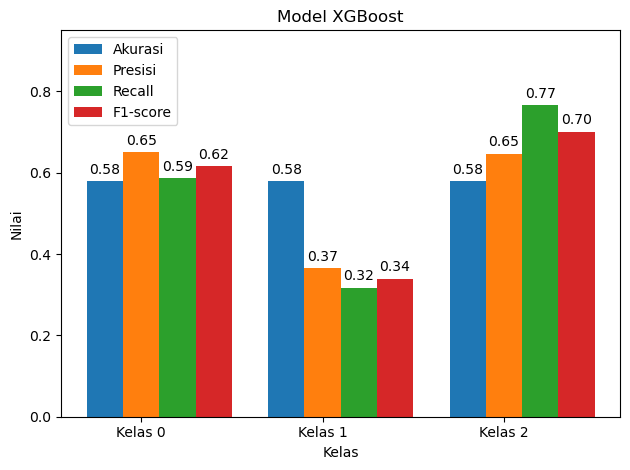

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.58
precision = [0.65027322, 0.36551724, 0.64705882]
recall = [0.5862069,  0.31736527, 0.76521739]
f1 = [0.61658031, 0.33974359, 0.70119522]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model XGBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 0.95])
plt.tight_layout()
plt.show()

In [14]:
lgbItaly = lgb.LGBMClassifier(random_state=10)
lgbItaly.fit(X_train, y_train)
lgbItaly_pred = lgbItaly.predict(X_test)
print(lgbItaly_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, lgbItaly_pred)*100)

[0 2 2 2 1 2 0 2 0 1 0 2 2 1 2 2 2 0 1 1 2 2 0 2 1 0 1 2 1 2 0 1 2 1 2 2 2
 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 1 2 0 2 2 0 2 2 1 1 0 1 2 2 0 1 0 0 1
 1 1 1 2 2 1 2 0 1 2 0 2 0 0 2 0 2 2 2 0 2 0 2 2 0 2 1 1 2 1 0 0 2 0 2 2 1
 1 0 2 2 2 0 0 1 1 1 2 2 2 2 2 0 1 0 0 2 0 0 1 0 2 2 0 2 0 0 0 0 0 1 2 2 0
 2 2 2 1 2 2 2 2 1 1 2 2 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2
 0 1 0 0 1 2 1 2 0 2 2 0 1 2 1 0 0 1 0 2 2 2 2 1 0 0 2 2 2 2 2 2 2 1 2 2 0
 2 2 2 2 2 1 2 0 1 0 1 0 0 2 2 0 0 1 2 2 1 1 1 0 1 1 1 2 1 0 2 1 2 0 0 2 0
 2 2 1 1 0 2 0 1 2 1 0 2 0 0 2 2 0 2 1 1 2 2 0 0 2 0 1 2 0 2 1 0 1 1 2 2 2
 2 2 0 0 0 0 1 1 2 2 2 0 0 1 0 0 0 0 0 0 2 1 0 1 2 2 0 1 0 2 1 1 0 2 2 1 1
 0 2 2 1 0 2 1 0 2 0 2 1 2 2 2 0 2 2 2 1 1 0 0 1 2 0 2 2 1 2 2 2 0 0 2 1 2
 2 0 2 0 0 0 2 0 2 2 0 2 2 2 2 0 1 0 0 2 2 2 0 0 2 2 2 0 2 0 0 1 0 2 0 2 1
 1 2 2 1 0 0 1 0 1 1 0 0 1 2 0 0 1 2 1 2 0 1 0 2 0 2 1 1 0 0 1 2 1 1 2 2 2
 0 0 1 1 0 1 0 1 2 2 0 2 0 0 2 1 0 0 2 1 1 0 1 2 1 0 1 1 2 0 1 2 2 2 2 0 0
 0 2 1 1 0 2 0 2 0 2 2 2 

In [15]:
print(classification_report(y_test,lgbItaly_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       203
           1       0.42      0.35      0.38       167
           2       0.66      0.79      0.72       230

    accuracy                           0.61       600
   macro avg       0.59      0.59      0.58       600
weighted avg       0.60      0.61      0.60       600



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, lgbItaly_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, lgbItaly_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, lgbItaly_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, lgbItaly_pred, average=None)

print("LightGBM")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

LightGBM
Akurasi: 0.6083333333333333
Presisi: [0.68681319 0.41549296 0.6557971 ]
Recall: [0.61576355 0.35329341 0.78695652]
F1-score: [0.64935065 0.38187702 0.71541502]


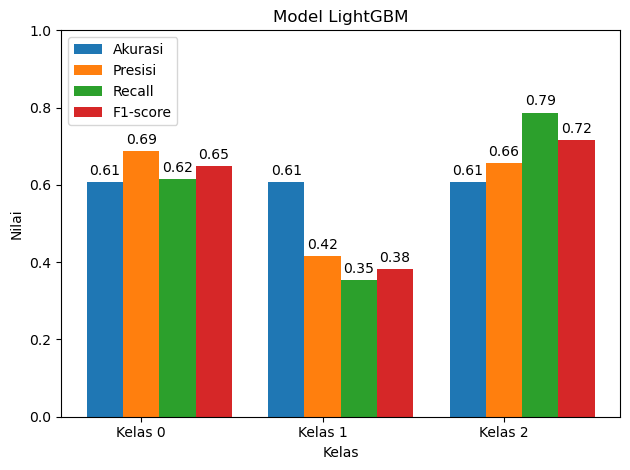

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6083333333333333
precision = [0.68681319, 0.41549296, 0.6557971 ]
recall = [0.61576355, 0.35329341, 0.78695652]
f1 = [0.64935065, 0.38187702, 0.71541502]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model LightGBM')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [18]:
abItaly = AdaBoostClassifier(random_state=10, learning_rate=0.20)
abItaly.fit(X_train, y_train)
abItaly_pred = abItaly.predict(X_test)
print(abItaly_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, abItaly_pred)*100)

[0 2 2 2 2 0 0 2 0 0 0 2 1 1 2 2 2 1 1 2 2 2 0 2 1 0 1 2 2 2 0 1 2 1 2 2 2
 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 1 0 0 2 0 0 1 2 1 1 0 1 2 2 1 2 0 0 1
 1 2 1 2 2 2 2 1 0 2 0 2 0 2 2 0 2 2 2 0 2 0 2 2 0 2 1 1 2 2 2 0 2 0 2 2 2
 1 0 2 2 2 1 0 1 1 0 2 2 2 2 2 0 2 0 0 2 0 1 1 0 1 2 0 2 0 0 1 0 1 1 2 2 0
 2 2 2 2 2 2 2 1 1 1 2 1 1 2 0 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 0 1 0 2 1 2 2 2 0 1 2 0 0 2 1 1 0 2 1 2 2 2 1 2 0 0 2 2 2 1 2 2 2 1 2 2 0
 2 2 2 2 2 0 2 0 1 0 1 0 0 2 2 0 0 1 2 1 2 0 2 2 2 1 1 0 1 0 2 1 2 0 0 1 2
 2 2 1 0 0 2 0 2 2 1 0 2 0 0 2 0 0 2 0 2 1 1 0 1 2 0 0 1 0 2 1 0 1 1 2 2 2
 2 2 0 0 0 0 1 2 2 2 2 0 0 1 0 0 0 0 0 0 2 2 0 0 2 2 0 1 0 1 1 2 0 2 2 1 1
 0 2 2 2 0 2 2 0 2 0 2 0 1 2 2 0 2 1 2 1 0 0 0 1 2 0 2 2 0 2 2 2 0 0 2 1 1
 2 0 1 0 1 0 2 0 2 2 0 2 2 2 1 0 2 0 0 2 2 2 1 0 2 1 2 0 2 0 0 2 0 1 0 2 0
 2 2 2 1 0 0 1 2 1 1 0 0 0 1 0 0 1 2 0 2 0 1 0 2 0 2 1 2 1 0 1 2 2 2 2 2 2
 0 2 0 1 0 1 0 1 1 2 0 2 0 0 2 2 0 0 2 1 1 2 0 2 1 0 0 1 2 0 0 2 2 2 1 0 0
 0 1 2 2 0 2 1 2 0 1 2 2 

In [19]:
print(classification_report(y_test,abItaly_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       203
           1       0.49      0.34      0.40       167
           2       0.67      0.83      0.74       230

    accuracy                           0.65       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.63      0.65      0.63       600



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, abItaly_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, abItaly_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, abItaly_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, abItaly_pred, average=None)

print("AdaBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AdaBoost
Akurasi: 0.6483333333333333
Presisi: [0.71794872 0.48717949 0.66666667]
Recall: [0.68965517 0.34131737 0.83478261]
F1-score: [0.70351759 0.40140845 0.74131274]


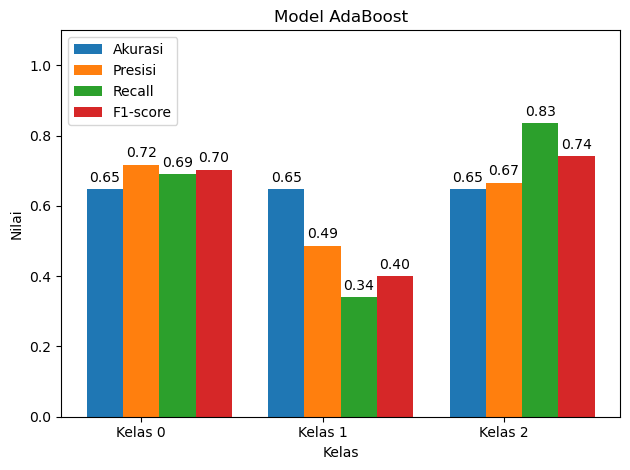

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6483333333333333
precision = [0.71794872, 0.48717949, 0.66666667]
recall = [0.68965517, 0.34131737, 0.83478261]
f1 = [0.70351759, 0.40140845, 0.74131274]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model AdaBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()

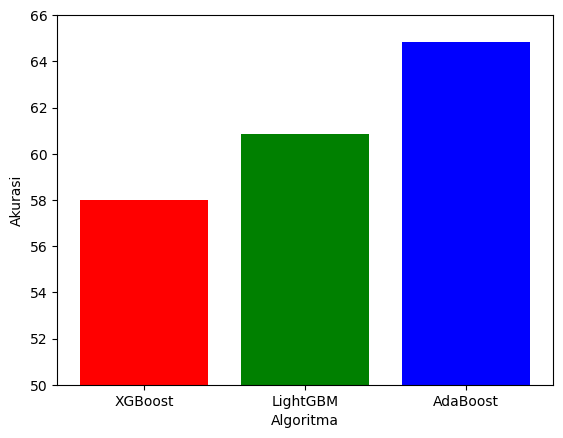

In [22]:
import matplotlib.pyplot as plt

# Data hasil akurasi algoritma
algoritma = ['XGBoost', 'LightGBM', 'AdaBoost']
akurasi = [57.99999999999999, 60.83333333333333, 64.83333333333333]

# Warna untuk setiap batang
colors = ['red', 'green', 'blue']

# Membuat diagram batang dengan warna yang ditentukan
plt.bar(algoritma, akurasi, color=colors)

# Memberikan judul dan label sumbu
#plt.title('Hasil Akurasi Dengan Data Liga Spanyol')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')

# Mengatur batas sumbu y pada rentang 0 hingga 100
plt.ylim(50, 66)

# Menampilkan diagram batang
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

print("Model XGBoost\n", confusion_matrix(y_test, grItaly_pred))
print("\n")
print("Model LightGBM\n", confusion_matrix(y_test, lgbItaly_pred))
print("\n")
print("Model AdaBoost\n", confusion_matrix(y_test, abItaly_pred))

Model XGBoost
 [[119  53  31]
 [ 49  53  65]
 [ 15  39 176]]


Model LightGBM
 [[125  50  28]
 [ 41  59  67]
 [ 16  33 181]]


Model AdaBoost
 [[140  33  30]
 [ 44  57  66]
 [ 11  27 192]]


Menyimpan Model

In [24]:
import pickle

In [25]:
filename = 'italy.sav'
pickle.dump(abItaly, open(filename, 'wb'))